In [19]:
pip install TA_Lib‑0.4.0‑cp311‑cp311‑win_amd64.whl


Note: you may need to restart the kernel to use updated packages.


ERROR: TA_Lib\u20110.4.0\u2011cp311\u2011cp311\u2011win_amd64.whl is not a valid wheel filename.


In [16]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import talib as tl
import plotly.express as pe

ModuleNotFoundError: No module named 'talib'

In [13]:
import sys
sys.path.append('..')

## Load Historical Data and News data


In [3]:
file_path = "../data/raw/raw_analyst_ratings.csv"
from scripts.file_loader import load_file

In [4]:
news_data = load_file(file_path)
news_data.head()

File successfully loaded: ../data/raw/raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
news_data[news_data["stock"] == "GOOG"]

,Unnamed: 0,headline,url,publisher,date,stock
565380,568379,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10 15:25:13-04:00,GOOG
565381,568380,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 13:18:50-04:00,GOOG
565382,568381,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10 00:28:00-04:00,GOOG
565383,568382,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09 14:39:26-04:00,GOOG
565384,568383,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09 03:51:41-04:00,GOOG
...,...,...,...,...,...,...
566574,569584,Loup's Munster On Alphabet/Google Notes Short-...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2018-11-15 00:00:00,GOOG
566575,569585,"Moderate Inflation, Positive Retail Earnings O...",https://www.benzinga.com/news/earnings/18/11/1...,JJ Kinahan,2018-11-14 00:00:00,GOOG
566576,569586,UPDATE: JANA Partners 13F Shows Fund Liquidate...,https://www.benzinga.com/news/18/11/12696718/u...,Benzinga Newsdesk,2018-11-14 00:00:00,GOOG
566577,569587,Startup Point Of Sale Operating System Poynt R...,https://www.benzinga.com/fintech/18/11/1268071...,Spencer White,2018-11-13 00:00:00,GOOG


: 

#### Shape or Size of news data

In [5]:
news_data.shape

(1407328, 6)

#### Checking news data for missing values

In [6]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

### Descriptive Statistics no News Dataset


#### Headline length of news data


In [7]:
headline_lengths = news_data['headline'].apply(len)

In [8]:
headline_lengths.head(20)

0      39
1      42
2      29
3      44
4      87
5      71
6      73
7     120
8      84
9      42
10     47
11     84
12     49
13    120
14     94
15     35
16     78
17     81
18     88
19     68
Name: headline, dtype: int64

### Find Mean, Median, Mode, Minimum and Maximum of News data headline

In [9]:
np.round(headline_lengths.describe(),2) 

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

#### Number of published articles in specific date


In [10]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(20)

date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
2019-08-07 00:00:00    1114
2020-03-11 00:00:00    1102
2018-11-01 00:00:00    1101
2018-08-08 00:00:00    1089
2020-04-15 00:00:00    1067
2019-11-07 00:00:00    1065
2018-08-01 00:00:00    1062
2020-03-09 00:00:00    1052
2020-01-22 00:00:00    1048
2020-01-21 00:00:00    1046
Name: count, dtype: int64

### Time Series Analysis


#### date to datetime for analysis

In [ ]:
# Convert date to datetime for analysis
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data.head(3)

#### Basic Statistics for Headline Lengths


In [ ]:
news_data['headline_length'] = news_data['headline'].apply(len)
length_stats = news_data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(length_stats)

#### Count the Number of Articles per Publisher

In [ ]:
publisher_counts = news_data['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)

#### Analyze Publication Dates

In [ ]:
news_data['day_of_week'] = news_data['date'].dt.day_name()
publication_trends = news_data['day_of_week'].value_counts()
print("\nPublication Trends (Articles by Day of the Week):")
print(publication_trends)

#### Visualizing Headline Lengths

In [ ]:

# 1. Visualizing Headline Lengths
plt.figure(figsize=(10, 6))
sns.histplot(news_data['headline_length'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Visualizing Article Counts per Publisher

In [ ]:
# 2. Visualizing Article Counts per Publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Visualizing Publication Trends by Day of the Week

In [ ]:
# 3. Visualizing Publication Trends by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')
plt.title('Publication Trends by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Text Analysis(Sentiment analysis & Topic Modeling)

In [14]:
from scripts.financial_analysis import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)

In [15]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,0.0


###### Convert >0 into positive, <0 into negative and 0 into neutral

In [16]:
news_data['sentiment_score_word'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

<Axes: xlabel='date'>

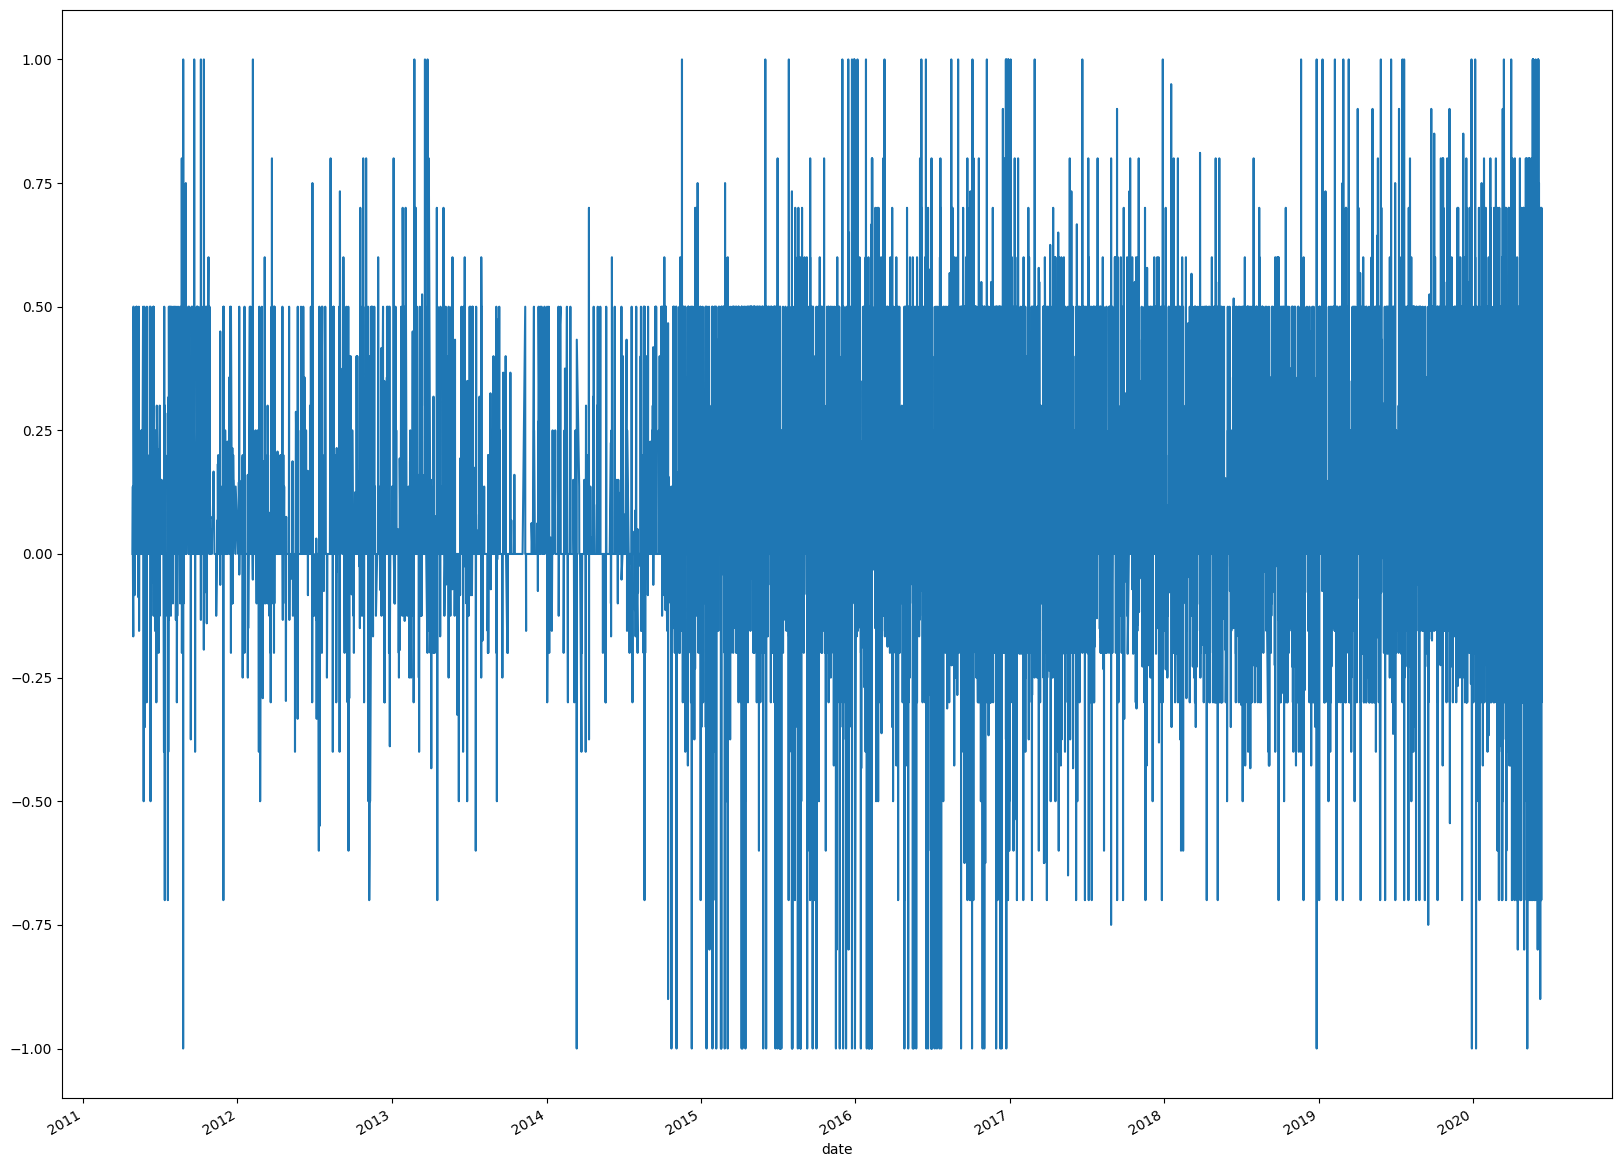

In [17]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))

In [18]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_score,sentiment_score_word
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,0.0,neutral


### Number of Published articles with respect to sentiment categories


In [19]:
numberOfSentimentCategories=news_data['sentiment_score_word'].value_counts()
print(numberOfSentimentCategories)

sentiment_score_word
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64


In [20]:
# View sentiment counts
sentiment_counts = news_data['sentiment_score_word'].value_counts()
print(sentiment_counts)

sentiment_score_word
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64


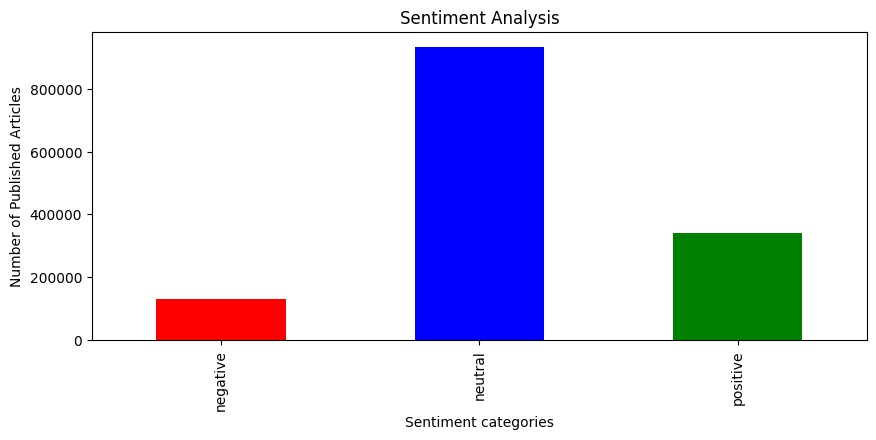

In [21]:
from scripts.financial_analysis import numberOfArticlesWithSentimentAnalysis
numberOfArticlesWithSentimentAnalysis(news_data)

### Sentiment categories by percentage

In [22]:
import numpy as np
numberOfSentiment=news_data['sentiment_score_word'].shape
persentOfCategories = np.round((numberOfSentimentCategories/numberOfSentiment)*100,1)
persentOfCategories.head()

sentiment_score_word
neutral     66.4
positive    24.2
negative     9.3
Name: count, dtype: float64

## Time Series Analysis:

In [23]:
# news_data['date'] = pd.to_datetime(news_data['date'], utc=True)

# # news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# news_data['date'].dt.to_period('Y').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# # There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.

In [24]:
### Publication Frequency Over Time ###
# Group by date and count the number of publications
news_data['publication_date'] = news_data['date'].dt.date
daily_counts = news_data.groupby('publication_date').size()

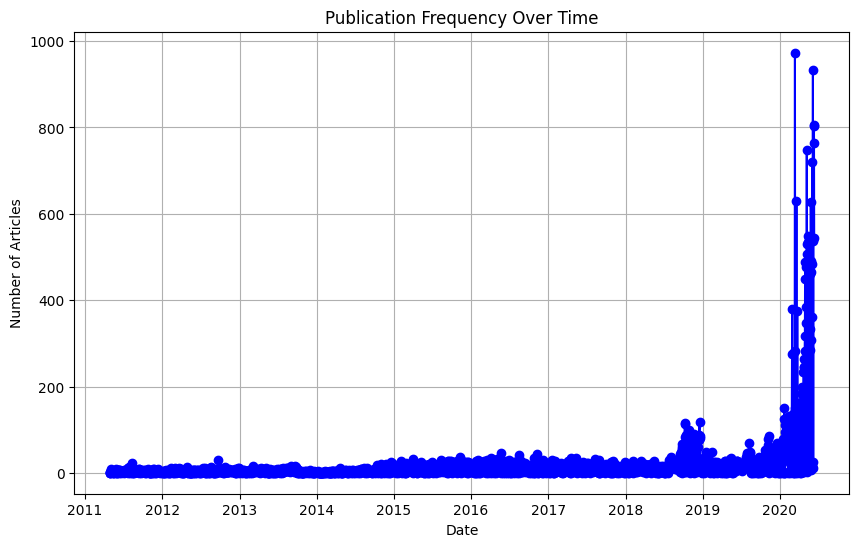

In [25]:
# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [26]:
### Publishing Times Analysis ###
# Extract hour from the `date` column
news_data['publication_hour'] = news_data['date'].dt.hour

# Count the number of publications by hour
hourly_counts = news_data['publication_hour'].value_counts().sort_index()


C:\Users\Coop\AppData\Local\Temp\ipykernel_18584\661213086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


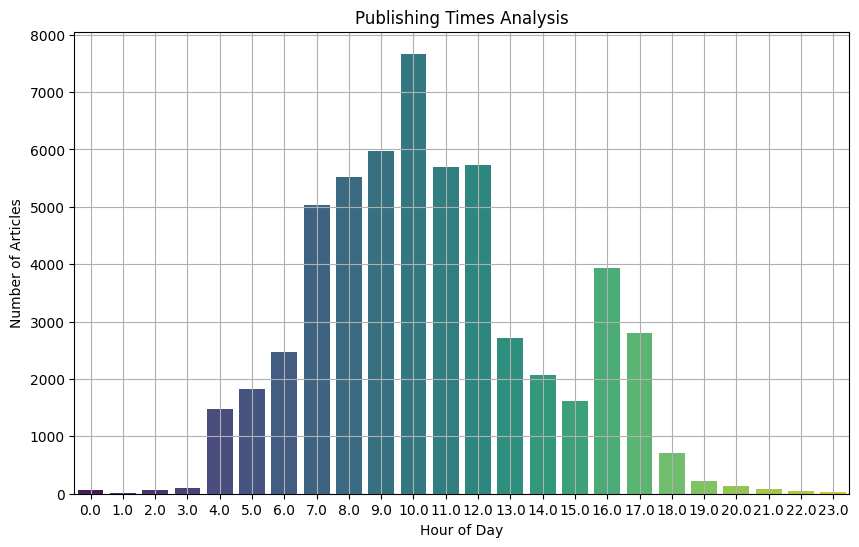

In [27]:
# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Publishing Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show();

# Publisher Analysis

##### Show top 20 publisher by number of published articles

In [28]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(20)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

##### Show last 20 publisher by number of published articles


In [29]:
publisher_counts.tail(20)


publisher
LeftCoastHedgie        1
ProactiveInvestors     1
Frank Zorrila          1
Goatmug Blog           1
Christian Fromhertz    1
swenstock              1
BuyAndHoldPlus         1
cyrus21                1
Stan Blacker           1
pagetraffic            1
GeoInvesting           1
Tom Kee                1
Greg W. Harmon         1
TradingPub             1
Ethan Joseph           1
Matthew Ely            1
Frank Ochoa            1
Jeremie Capron         1
Marvin Dumont          1
Igor Gonta             1
Name: count, dtype: int64

#### Sentiment analysis for Top Three publisher

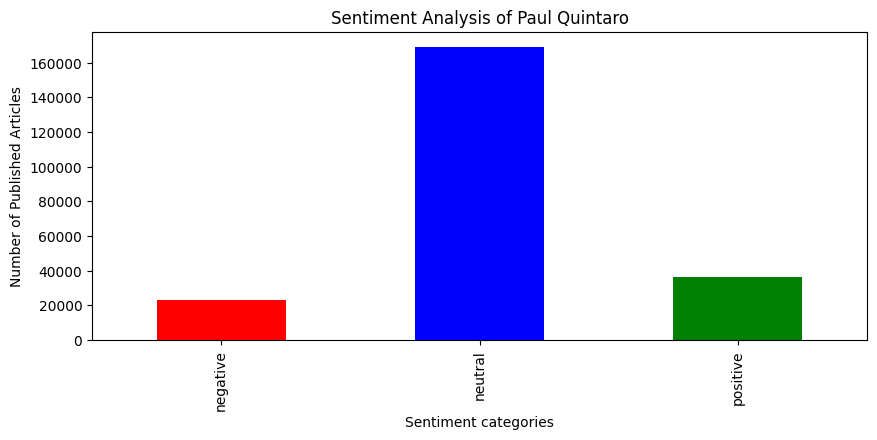

In [30]:
from scripts.financial_analysis import getSentimentAnalysisOfPublisher
getSentimentAnalysisOfPublisher(news_data,'Paul Quintaro')

In [31]:
### Publishers Contribution ###
# Count articles per publisher
publisher_counts = news_data['publisher'].value_counts()

C:\Users\Coop\AppData\Local\Temp\ipykernel_18584\1730640537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")


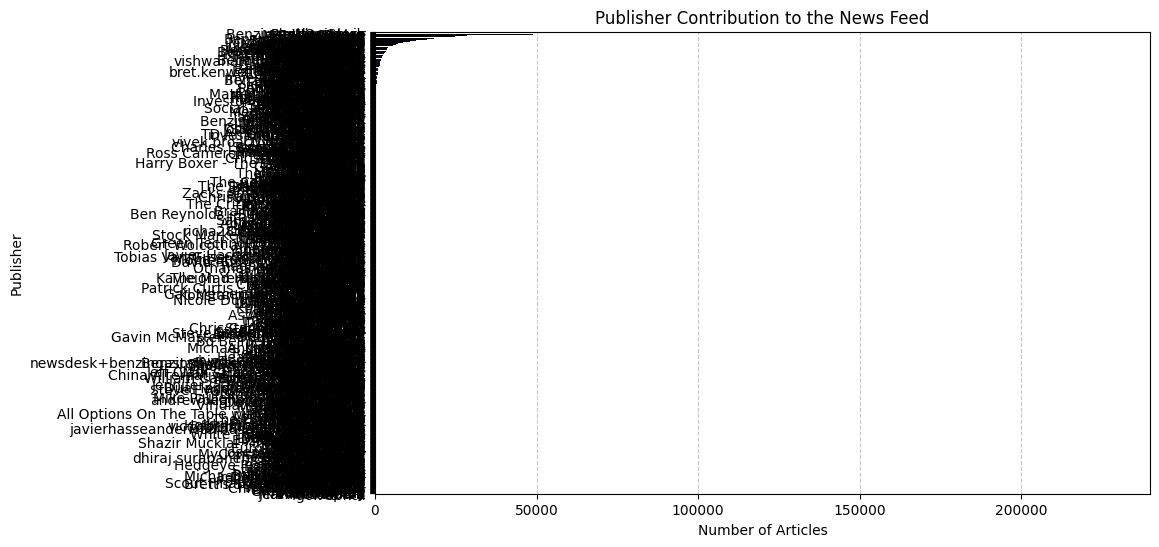

In [32]:
# Plot publisher contribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")
plt.title("Publisher Contribution to the News Feed")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [33]:
### Extract Unique Domains from Email Addresses ###
# Identify if a publisher name is an email address
news_data['is_email'] = news_data['publisher'].str.contains('@')

# Extract domain from email addresses
news_data['domain'] = news_data['publisher'].apply(
    lambda x: x.split('@')[1] if '@' in x else None
)

# Count the number of articles by domain
domain_counts = news_data['domain'].value_counts()

In [34]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_score,sentiment_score_word,publication_date,publication_hour,is_email,domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,0.0,neutral,2020-06-05,10.0,False,None
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,0.0,neutral,2020-06-03,10.0,False,None
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,0.0,neutral,2020-05-26,4.0,False,None
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,0.0,neutral,2020-05-22,12.0,False,None
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,0.0,neutral,2020-05-22,11.0,False,None


In [35]:
news_data.to_csv("../data/processed/news_data.csv", index=False)
